In [41]:
import numpy as np
from src.dynamics_library.gaussian import Gaussian


x0 = np.zeros((3, 1))
x0[0, 0] = 2.24411562
P0 = 5 * np.eye(3)
prior = Gaussian.from_moment(x0, P0)

noise = Gaussian.from_moment(np.array([0]).reshape(1,1), np.array([1]).reshape(1,1))

C = np.array([[1, 1, 0]])
R = 1.0

N = 100_000
X_samples = prior.simulate(N)
noise_samples = noise.simulate(N)

X_samples.shape

(3, 100000)

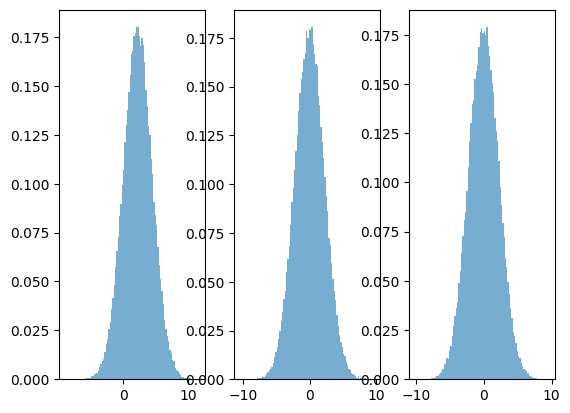

In [42]:
import matplotlib.pyplot as plt
x1_samples = X_samples[0,:]
x2_samples = X_samples[1,:]
x3_samples = X_samples[2,:]

plt.subplot(1,3,1)
plt.hist(x1_samples, bins=100, density=True, alpha=0.6, label="Monte Carlo")

plt.subplot(1,3,2)
plt.hist(x2_samples, bins=100, density=True, alpha=0.6, label="Monte Carlo")

plt.subplot(1,3,3)
plt.hist(x3_samples, bins=100, density=True, alpha=0.6, label="Monte Carlo")
plt.show()

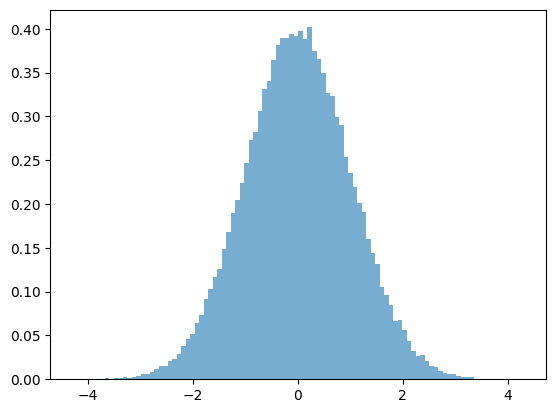

In [43]:
noise_samples.shape
plt.hist(noise_samples[0,:], bins=100, density=True, alpha=0.6, label="Monte Carlo")
plt.show()

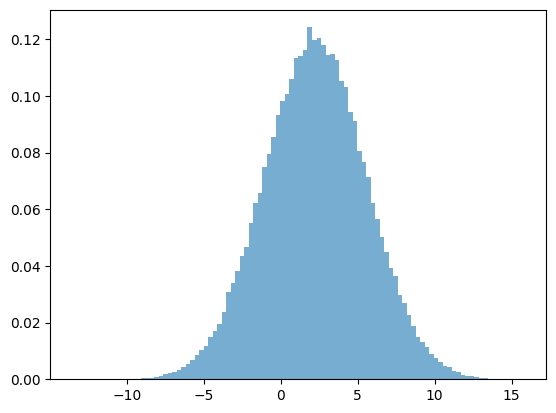

In [44]:
y_samples = C@X_samples + noise_samples
y_samples.shape

plt.hist(y_samples[0,:], bins=100, density=True, alpha=0.6, label="Monte Carlo")
plt.show()

In [45]:
print(f"Mean: {np.mean(y_samples[0,:]):.3f}")
print(f"Cov: {np.cov(y_samples[0,:]):.3f}")

Mean: 2.241
Cov: 10.991


In [46]:
y_gaus = Gaussian.from_samples(y_samples)
print(f"Mean: {y_gaus.mu}")
print(f"Cov: {y_gaus.cov}")

Mean: [[2.24123015]]
Cov: [[10.99071127]]


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x1_samples = x1_samples[0, :]  # shape (N,)
mu_kf = joint.mu[0, 0]
sigma_kf = np.sqrt(joint.cov[0, 0])

plt.figure(figsize=(8, 4))
plt.hist(x1_samples, bins=100, density=True, alpha=0.6, label="Monte Carlo")

x_vals = np.linspace(min(x1_samples), max(x1_samples), 300)
plt.plot(x_vals, norm.pdf(x_vals, mu_kf, sigma_kf), color='red', label="Kalman PDF")

plt.title("Posterior Distribution of $x_1$")
plt.xlabel("$x_1$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
import scipy
x0 = np.zeros((3,1))
x0[0,0] = 2.24411562

Pp = 5 * np.eye(3)
C = np.array([[1, 1, 0]])

meas = C @ x0
# => [[2.24411562]]

py_x = C @ Pp @ C.T + 1